# Introduction
In this notebook, we are going to calculate universality parameter by analytical manner using mathematical formula represented by barzel. The calculation contains these steps:
1. Generate complex network (graph + dynamic)
2. Estiamte steady state
3. Calculate local correlation matrix (R)
4. Calculate correlation matrix (G) by solving leanire equations system

# Calculation

In [1]:
from libs.factory import *
from libs.util import *
import networkx as nx
import numpy as np
from sympy import symbols, solve_poly_system
import matplotlib.pyplot as plt

[(0, 3), (1, 7), (2, 4), (3, 4), (4, 5), (5, 5), (6, 4), (7, 3), (8, 3), (9, 2)]


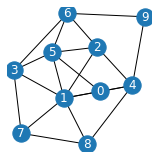

In [23]:
seed = 1234
number_of_nodes = 10

np.random.seed(seed)
graph = get_graph(number_of_nodes, 'small_world', seed=seed)
adjacency = nx.to_numpy_matrix(graph).A

print(graph.degree)
plt.rcParams["figure.figsize"] = (2,2)
nx.draw(graph, with_labels=True, font_color='white')
plt.show()

## Biochemical Dynamic

In [24]:
F = .5
B = .2
R = 3

steady = [F/(R/graph.degree(i) + B) for i in range(0,number_of_nodes)]
print('steady_state:', steady)

steady_state: [0.4166666666666667, 0.7954545454545455, 0.5263157894736842, 0.5263157894736842, 0.625, 0.625, 0.5263157894736842, 0.4166666666666667, 0.4166666666666667, 0.29411764705882354]


In [25]:
def q_bar_prime_i(i, j):
    return -F/(R*steady[i]*steady[i]*steady[j])
    
def q_bar_prime_j(i, j):
    return -(F-B*steady[i])/(R*steady[j]*steady[j]*steady[i])


def r_i_j(i,j):
    if adjacency[i,j] == 0:
        return 0
    
    sum = 0
    for k in range(0,number_of_nodes):
        if adjacency[i,k] == 1:
            sum = sum + q_bar_prime_i(i,k)
    
    return steady[j]*q_bar_prime_j(i,j)/(steady[i]*sum)


r = np.array([[r_i_j(i,j) for j in range(0,number_of_nodes)] for i in range(0,number_of_nodes)])
print('R:', r)

R: [[0.         0.23504274 0.         0.         0.2991453  0.2991453
  0.         0.         0.         0.        ]
 [0.11523688 0.         0.09122919 0.09122919 0.07682458 0.07682458
  0.         0.11523688 0.11523688 0.        ]
 [0.         0.15612064 0.         0.         0.19869899 0.19869899
  0.23595506 0.         0.         0.        ]
 [0.         0.13867003 0.         0.         0.         0.17648913
  0.20958084 0.26473369 0.         0.        ]
 [0.15849057 0.08301887 0.1254717  0.         0.         0.
  0.         0.         0.15849057 0.2245283 ]
 [0.19236641 0.10076336 0.15229008 0.15229008 0.         0.
  0.15229008 0.         0.         0.        ]
 [0.         0.         0.17045455 0.17045455 0.         0.14354067
  0.         0.         0.         0.30502392]
 [0.         0.18851757 0.         0.28491859 0.         0.
  0.         0.         0.35989717 0.        ]
 [0.         0.19927536 0.         0.         0.25362319 0.
  0.         0.38043478 0.         0.     

In [32]:
def _g(i, j):
    if i == j:
        return syms[i][j] - 1
    
    eq = syms[i][j]
    for q in range(0,number_of_nodes):
        eq = eq - r[i,q]*syms[q][j]
    return eq

In [33]:
syms = [[symbols('{}_{}'.format(i,j)) for i in range(0,number_of_nodes)] for j in range(number_of_nodes)]
eq_system = [_g(int(cnt/number_of_nodes),cnt%number_of_nodes) for cnt in range(0,number_of_nodes*number_of_nodes)]
                        
g = solve_poly_system(eq_system)
print('G:', g)

G: [(1.00000000000000, 0.225028893681966, 0.182262177085761, 0.153535964206839, 0.267584229064921, 0.289675405568997, 0.154281895446081, 0.146834778116610, 0.168569336555422, 0.181832865844898, 0.429620432767838, 1.00000000000000, 0.342863683633310, 0.368851369906722, 0.321538643850314, 0.328906802830746, 0.243691275536569, 0.457289153448801, 0.454793718049442, 0.246422332860500, 0.216905555927619, 0.213721870473796, 1.00000000000000, 0.190761185466515, 0.263057595823745, 0.294102364333456, 0.325041372330608, 0.155235454583562, 0.168363975778967, 0.261799351448608, 0.194596183212565, 0.244866263743281, 0.203160880733738, 1.00000000000000, 0.165075305116664, 0.293037014395618, 0.313219589815533, 0.421407465673084, 0.250980796230873, 0.216614548446093, 0.437033155292963, 0.275068212311652, 0.361019446636131, 0.212721694576935, 1.00000000000000, 0.244814380877322, 0.299770035680805, 0.258919995781489, 0.406939678384772, 0.546948672552991, 0.424066391591361, 0.252201952271805, 0.3617817241

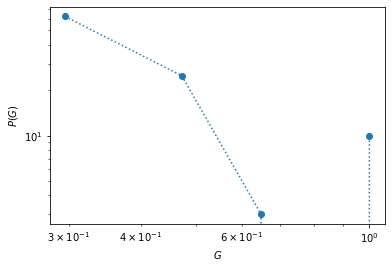

In [34]:
plot_g([abs(float(f)) for f in list(g[0])])